In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
print(session.query(func.max(measurement.date)).one()[0])

# session.query(measurement.date).order_by(measurement.date.desc()).first()

max_date = dt.date(2017, 8, 23)

2017-08-23


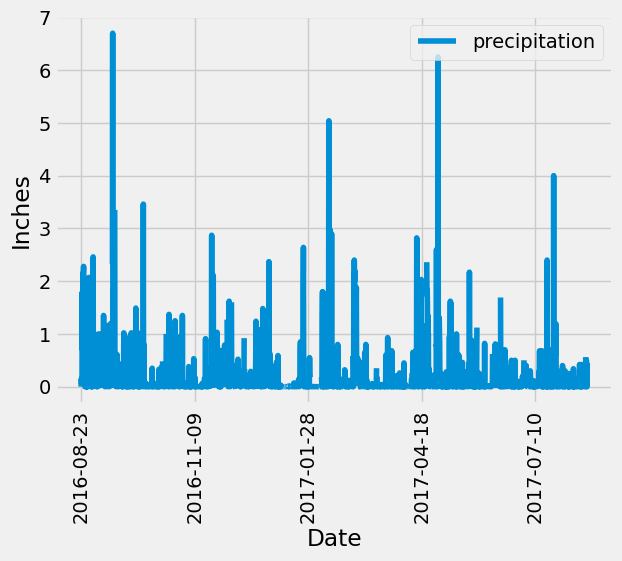

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
min_date = max_date - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prec_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= min_date).\
    order_by(measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(prec_data, columns=['date', 'prcp'])

prec_df.set_index('date', inplace=True)

# Sort the dataframe by date
prec_df = prec_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

prec_df.plot.line(use_index=True)
plt.xticks(rotation=90)
#plt.xlim(dt.date(2016,8,23), dt.date(2017,7,10))
plt.xlabel('Date')
plt.ylabel('Inches')
plt.legend(['precipitation'], loc='upper right')
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(station.name).distinct().count()

total_stations

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

sel = [measurement.station, 
       func.count(measurement.tobs)]

session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).all()

# station_count = []

# for s in session.query(station).distinct():
#     station_name = s.station
#     count = session.query(measurement).\
#                 filter_by(station=station_name).count()
#     station_count.append([station_name, count])
    
# stat_df = pd.DataFrame(station_count, columns = ['station', 'count'])
# #stat_df.set_index('station', inplace=True)
# stat_df = stat_df.sort_values('count', ascending=False)

# stat_df

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
stat_name = 'USC00519281'

sel = [measurement.station, 
       func.avg(measurement.tobs), 
       func.min(measurement.tobs), 
       func.max(measurement.tobs)]
temps = session.query(*sel).\
    filter(measurement.station==stat_name).all()

stemps = temps[0]
print(f"Station: {stemps[0]}, Avg = {stemps[1]}, Min = {stemps[2]}, Max = {stemps[3]}")


Station: USC00519281, Avg = 71.66378066378067, Min = 54.0, Max = 85.0


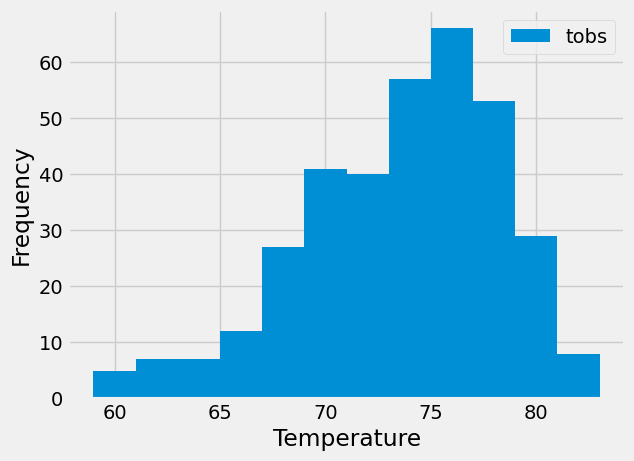

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_month_temps = session.query(measurement.tobs).\
    filter(measurement.station==stat_name).\
    filter(measurement.date >= min_date).all()

twelve_df = pd.DataFrame(twelve_month_temps, columns=['temp'])

plt.hist(twelve_df, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(['tobs'], loc='upper right')
plt.show()

# Close session

In [16]:
# Close Session
session.close()